In [6]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

df=pd.read_csv("heart_attack_prediction_dataset.csv")
df.isnull().sum()
df.isna().sum()

df.drop_duplicates(inplace=True)
datatype=df.dtypes
print(datatype)

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [7]:
# 
df['Sex'] = df['Sex'].replace({'Male': 0, 'Female': 1})

# one hot encoding for diet
diet= pd.get_dummies(df['Diet'])
df = pd.concat([df, diet], axis=1)
df['Average']=df['Average'].astype(np.float32)
df['Healthy']=df['Healthy'].astype(np.float32)
df['Unhealthy']=df['Unhealthy'].astype(np.float32)

In [5]:
# seperating low blood pressure and high blood pressure
bp_low = []
bp_high=[]
for i in df['Blood Pressure']:
    a=i.split('/')[0]
    b=i.split('/')[1]
    bp_low.append(a)
    bp_high.append(b)
df['Blood Pressure_low']=pd.Series(bp_low)
df['Blood Pressure_high']=pd.Series(bp_high)
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Average,Healthy,Unhealthy,Blood Pressure_low,Blood Pressure_high
0,67,0,208,158/88,72,0,0,1,0,0,...,31.251233,286,0,6,0,1.0,0.0,0.0,158,88
1,21,0,389,165/93,98,1,1,1,1,1,...,27.194973,235,1,7,0,0.0,0.0,1.0,165,93
2,21,1,324,174/99,72,1,0,0,0,0,...,28.176571,587,4,4,0,0.0,1.0,0.0,174,99
3,84,0,383,163/100,73,1,1,1,0,1,...,36.464704,378,3,4,0,1.0,0.0,0.0,163,100
4,66,0,318,91/88,93,1,1,1,1,0,...,21.809144,231,1,5,0,0.0,0.0,1.0,91,88


In [40]:
del df['Patient ID']
del df['Income']
del df['Country']
del df['Continent']
del df['Hemisphere']
del df['Blood Pressure']
del df['Diet']

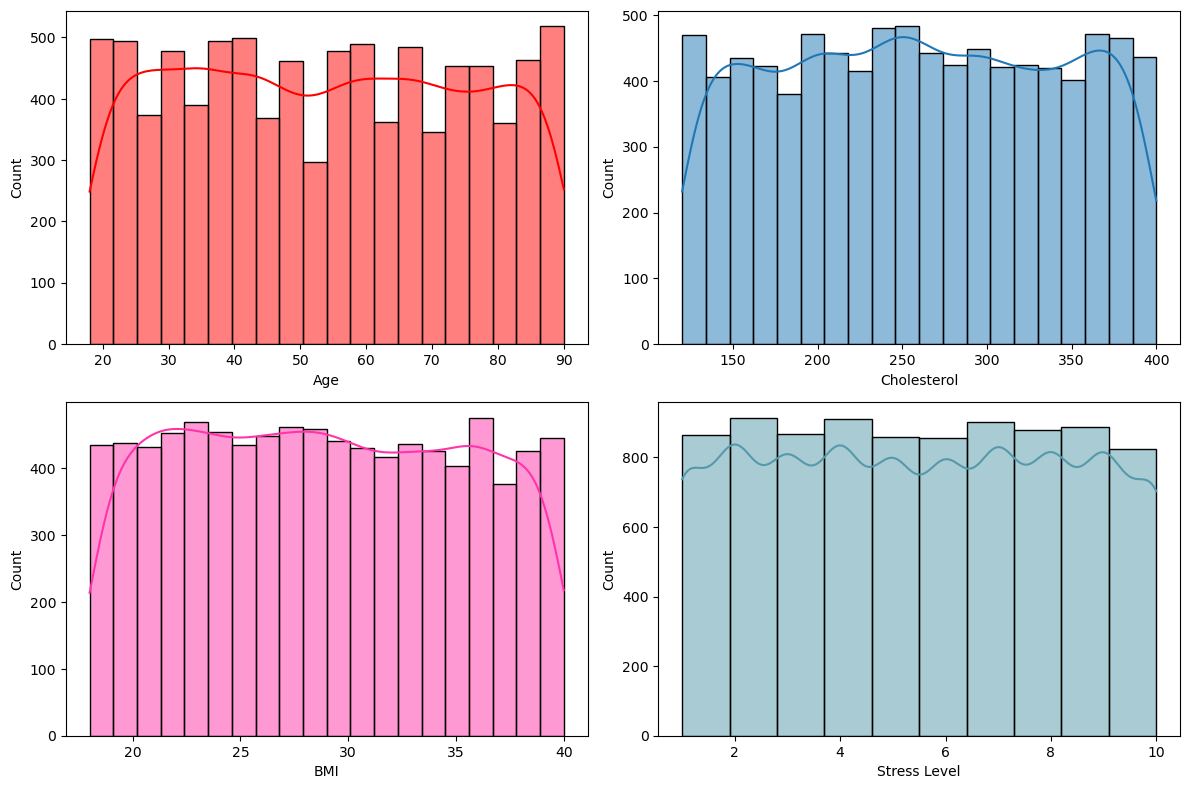

In [42]:
plt.figure(figsize=(12,8))

#age
plt.subplot(2,2,1)
sns.histplot(data=df, x='Age',bins=20,kde=True,color='r')
plt.title=('Distribution of Age')

# cholesterol
plt.subplot(2,2,2)
sns.histplot(data=df,x='Cholesterol',bins=20,kde=True)
#plt.title('Distribution of Cholesterol')



# Distribution of BMI
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='BMI', bins=20, kde=True, color='#ff34aa')
plt.title=('Distribution of BMI')

# streelevel
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Stress Level', bins=10, kde=True, color='#5599aa')
plt.title=('Distribution of Stress Level')

plt.tight_layout()
plt.show()

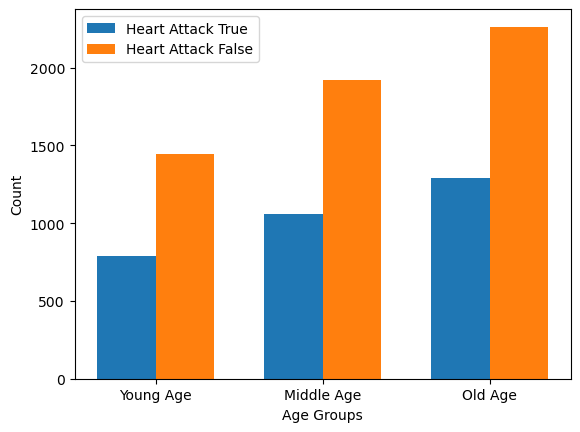

In [43]:
# Sample data - age and heart attack (True/False)
ages = df['Age']
heart_attack = df['Heart Attack Risk']

# Categorizing ages into young, middle, and old
young = [age for age in ages if 18 <= age <= 35]
middle = [age for age in ages if 36 <= age <= 60]
old = [age for age in ages if age >= 61]

# Counting heart attacks in each age group
heart_attack_young = sum([1 for idx, age in enumerate(ages) if 18 <= age <= 35 and heart_attack[idx]])
heart_attack_middle = sum([1 for idx, age in enumerate(ages) if 36 <= age <= 60 and heart_attack[idx]])
heart_attack_old = sum([1 for idx, age in enumerate(ages) if age >= 61 and heart_attack[idx]])

# Counting no heart attacks in each age group
no_heart_attack_young = len(young) - heart_attack_young
no_heart_attack_middle = len(middle) - heart_attack_middle
no_heart_attack_old = len(old) - heart_attack_old

# Grouped bar chart 
categories = ['Young Age', 'Middle Age', 'Old Age']
heart_attack_true = [heart_attack_young, heart_attack_middle, heart_attack_old]
heart_attack_false = [no_heart_attack_young, no_heart_attack_middle, no_heart_attack_old]

bar_width = 0.35
bar_positions_heart_attack_true = range(len(categories))
bar_positions_heart_attack_false = [pos + bar_width for pos in bar_positions_heart_attack_true]

plt.bar(bar_positions_heart_attack_true, heart_attack_true, bar_width, label='Heart Attack True')
plt.bar(bar_positions_heart_attack_false, heart_attack_false, bar_width, label='Heart Attack False')

plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title=('Heart Attack by Age Groups')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_heart_attack_true], categories)
plt.legend()

plt.show()


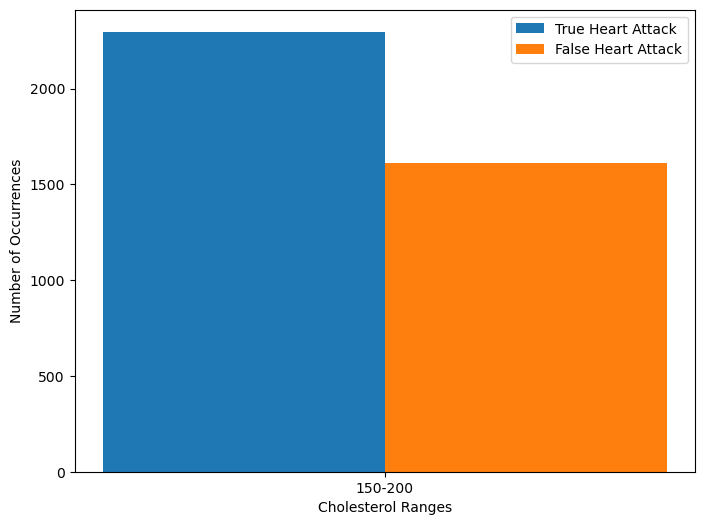

In [44]:
cholesterol = df['Cholesterol']
heart_attack = df['Heart Attack Risk']

# Define cholesterol ranges (bins)
bins = [150, 200, 250, 300, 350]  # Example bins, modify based on your data

# Categorize heart attacks based on cholesterol ranges
heart_attack_true = [value for index, value in enumerate(heart_attack) if cholesterol[index] >= bins[1]]
heart_attack_false = [value for index, value in enumerate(heart_attack) if cholesterol[index] < bins[1]]

# Count occurrences of True and False heart attacks in each range
heart_attack_true_counts = [heart_attack_true.count(True)]
heart_attack_false_counts = [heart_attack_false.count(False)]

# Plotting the bar plot
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = 0

plt.bar(index, heart_attack_true_counts, bar_width, label='True Heart Attack')
plt.bar(index + bar_width, heart_attack_false_counts, bar_width, label='False Heart Attack')

plt.xlabel('Cholesterol Ranges')
plt.ylabel('Number of Occurrences')
plt.title=('Heart Attack by Cholesterol Ranges')
plt.xticks([index + bar_width/2], ['150-200'])  # Update with appropriate range labels
plt.legend()

plt.show()


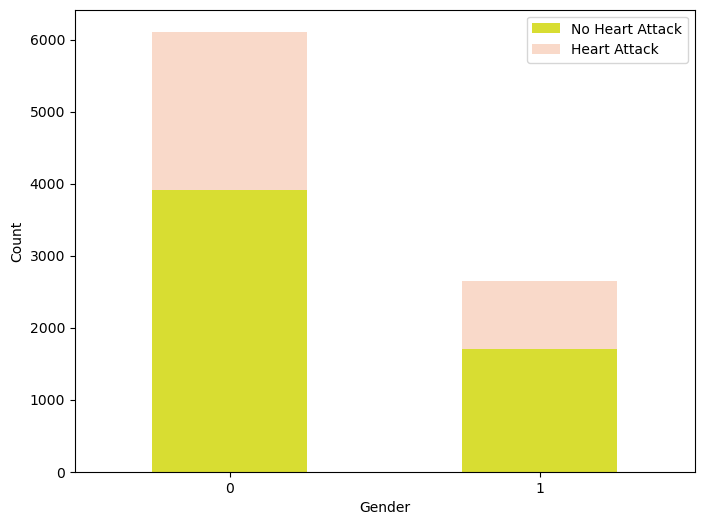

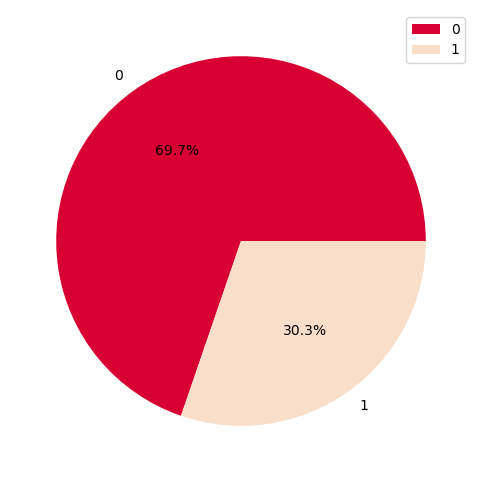

In [45]:
gender_heart_attack = df.groupby(['Sex', 'Heart Attack Risk']).size().unstack().fillna(0)

# Create a bar chart
plt.figure(figsize=(8, 6))
gender_heart_attack.plot(kind='bar', stacked=True, color=['#D8DD32', '#F9D9C9'], ax=plt.gca())
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.title('Gender Distribution by Heart Attack Risk Male/Female')
plt.xticks(rotation=0)
plt.legend(['No Heart Attack', 'Heart Attack'])
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 6))
gender_counts = df['Sex'].value_counts()
plt.legend(['No Heart Attack', 'Heart Attack'])
labels = ['Male', 'Female'] 
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#D80032', '#F9DEC9'])
plt.legend(labels=gender_counts.index, loc='upper right')

#plt.title('Gender Distribution')
plt.show()

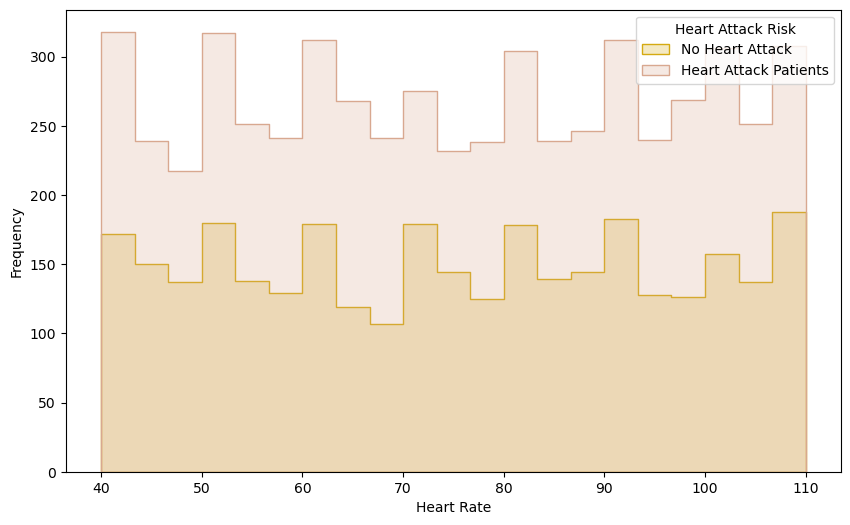

In [46]:
# Create histograms to visualize heart rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Heart Rate', hue='Heart Attack Risk', element='step', common_norm=False, palette=['#D8A890', '#D5AA11'])
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
#plt.title('Heart Rate Distribution by Heart Attack Risk')
plt.legend(title='Heart Attack Risk', labels=['No Heart Attack', 'Heart Attack Patients'])
plt.show()

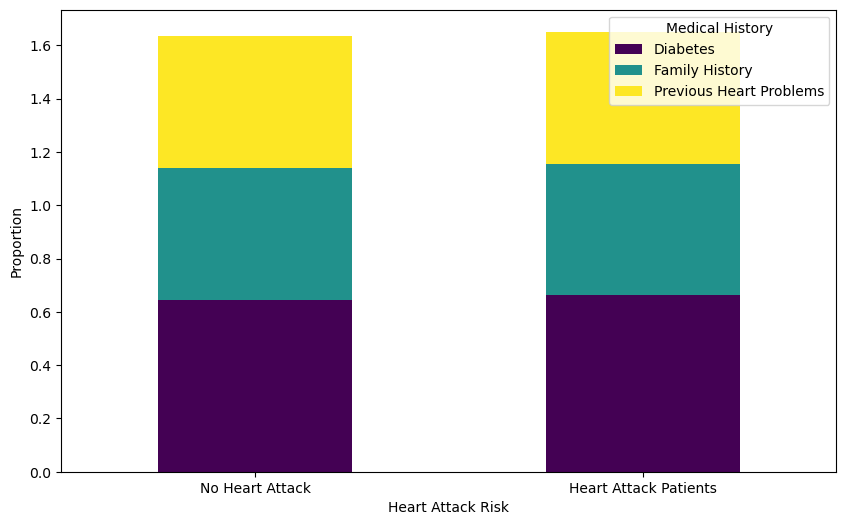

In [47]:
# Calculate the proportions of diabetes, family history, and previous heart problems by Heart Attack Risk
diabetes_proportions = df.groupby('Heart Attack Risk')['Diabetes'].value_counts(normalize=True)[:, 1]
family_history_proportions = df.groupby('Heart Attack Risk')['Family History'].value_counts(normalize=True)[:, 1]
previous_heart_problems_proportions = df.groupby('Heart Attack Risk')['Previous Heart Problems'].value_counts(normalize=True)[:, 1]

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Diabetes': diabetes_proportions,
    'Family History': family_history_proportions,
    'Previous Heart Problems': previous_heart_problems_proportions
})

# Create a stacked bar chart
data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
#plt.title('Proportion of Patients with Diabetes, Family History, and Previous Heart Problems by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No Heart Attack', 'Heart Attack Patients'], rotation=0)
plt.legend(title='Medical History')
plt.show()

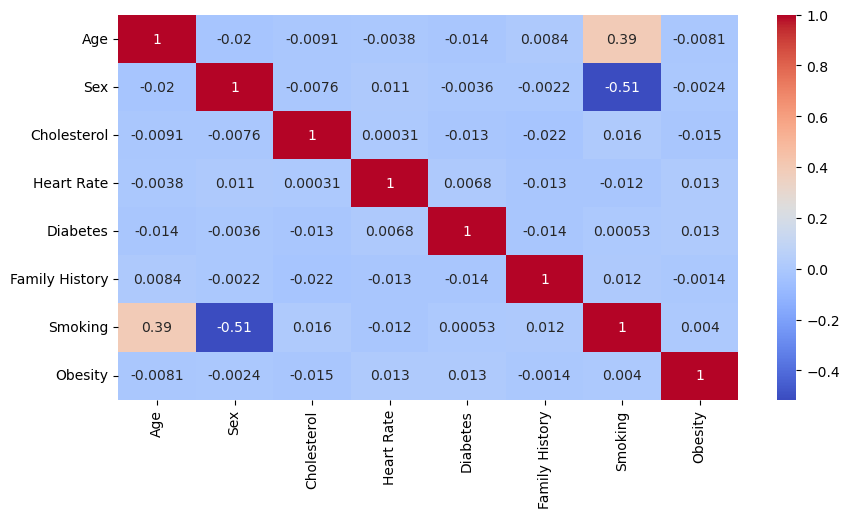

In [48]:
#correlation
data1=df[['Age','Sex','Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity']]
corrl=data1.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corrl, annot=True, cmap='coolwarm')
plt.show()

In [49]:
y=df['Heart Attack Risk']
X=df.select_dtypes(include=['float64', 'int64'])
del X['Heart Attack Risk']

In [50]:
# logistic regression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
y_train_pred=model.predict(X_train)
accuracy_l=accuracy_score(y_train,y_train_pred)
print("Accuracy of Logistic Regression for train dataset: ",accuracy_l*100)

predictions=logistic_model.predict(X_test)
accuracy_lt = accuracy_score(y_test,predictions)
print("Accuracy of Logistic Regression for test dataset: ",accuracy_lt*100)

Accuracy of Logistic Regression for train dataset:  100.0
Accuracy of Logistic Regression for test dataset:  64.17569880205363


C:\Users\power\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# decision tree
import sklearn.ensemble
model=sklearn.tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred=model.predict(X_train)
accuracy_d=accuracy_score(y_train,y_train_pred)
print(f"Accuracy of Decision Tree for train dataset: {accuracy_d*100:.2f}%")

y_pred= model.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred)
print("Accuracy of Decision for test dataset: ",accuracy_dt*100)

Accuracy of Decision Tree for train dataset:  100.0
Accuracy of Decision for test dataset:  54.249857387336


In [52]:
# knn 
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_train_pred=knn.predict(X_train)
accuracy_k=accuracy_score(y_train,y_train_pred)
print(f"Accuracy of KNN for train dataset: {accuracy_k*100:.2f}%")

y_pred= knn.predict(X_test)
accuracy_kt=accuracy_score(y_test,y_pred)
print(f"Accuracy of KNN for test dataset: {accuracy_kt*100:.2f}%")

Accuracy of KNN for train dataset:  72.55349500713267
Accuracy of KNN for test dataset:  57.95778665145465


In [ ]:
#svm
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_train=svm.predict(X_train)
acuracy_s=accuracy_score(y_train,y_pred_train)
print(f"Accuracy of SVM for train dataset: {accuracy_s*100:.2f}%")

y_pred = svm.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM for test dataset: {accuracy * 100:.2f}%")

In [9]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X= df[['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
        'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
        'Average', 'Healthy', 'Unhealthy',
       'Blood Pressure_low', 'Blood Pressure_high']]

Y=df['Heart Attack Risk']

In [10]:
# Generate an imbalanced dataset (replace this with your dataset)
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=50)




# Define random under-sampling
def random_under_sampling(X, y):
    class_counts = {label: sum(1 for value in y if value == label) for label in set(y)}
    minority_class = min(class_counts, key=class_counts.get)
    minority_indices = [index for index, value in enumerate(y) if value == minority_class]
    majority_indices = [index for index, value in enumerate(y) if value != minority_class]
    random_majority_indices = random.sample(majority_indices, len(minority_indices))
    balanced_indices = minority_indices + random_majority_indices
    return X[balanced_indices], y[balanced_indices]

# Define random over-sampling
def random_over_sampling(X, y):
    class_counts = {label: sum(1 for value in y if value == label) for label in set(y)}
    majority_class = max(class_counts, key=class_counts.get)
    majority_indices = [index for index, value in enumerate(y) if value == majority_class]
    minority_indices = [index for index, value in enumerate(y) if value != majority_class]
    random_minority_indices = random.choices(minority_indices, k=len(majority_indices))
    balanced_indices = majority_indices + random_minority_indices
    return X[balanced_indices], y[balanced_indices]

# Apply random under-sampling to balance the dataset
Balanced_X_under, Balanced_y_under = random_under_sampling(X, y)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Balanced_X_under, Balanced_y_under, test_size=0.2, random_state=42)

In [11]:
#Knn with under sampling dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN of Undersampling test dataset : {accuracy * 100:.2f}%")
print("F-score",round(f1_score(y_test, y_pred),2))
print("Precision: ",round(precision_score(y_test,y_pred),2))

Accuracy: 90.00%
F-score 0.9
Precision:  0.83
Accuracy:  90.0 %


In [14]:
# SVM with under sampling dataset
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("F-score",round(f1_score(y_test, y_pred),2))
print("Precision: ",round(precision_score(y_test,y_pred),2))
print("Accuracy: ",round(accuracy_score(y_test, y_pred)*100,2),"%")


Accuracy: 98.33%
F-score 0.98
Precision:  0.98
Accuracy:  98.33 %


In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(Balanced_X_under, Balanced_y_under, test_size=0.2, random_state=42)
Balanced_X_under, Balanced_y_under = random_over_sampling(X, y)
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")

print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy: ",round(accuracy_score(y_test, y_pred)*100,2),"%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy on Test Set: 99.17%
Precision:  1.0 Recall:  0.98
Accuracy:  99.17 %


In [18]:
# Naive Bayes Algorithm for undersampling dataset
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy* 100:.2f}%")

print("F-score",round(f1_score(y_test, y_pred),2))
print("Precision: ",round(precision_score(y_test,y_pred),2))


Accuracy: 94.17%
F-score 0.94
Precision:  0.9


In [17]:
# neural network algo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=62, activation='relu'))  # Adjust input_dim based on your actual feature dimension
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy* 100:.2f}%")
print("F-score",round(f1_score(y_test, y_pred),2))
print("Precision: ",round(precision_score(y_test,y_pred),2))




Accuracy: 94.17%
F-score 0.94
Precision:  0.9 Recall:  0.99
